# Avance de proyecto 2: Reporte de progreso
 ## Jorge Becker - A01027251
 
 * A continuación se presenta el Notebook de la entrega de la materia "Matemáticas y ciencia de datos para la toma de deciciones" La primera sección es el análisis de la primera base de datos que es de lo que yo me comí desde el 18 de febrero de 2021 hasta el 31 de marzo de 2021. Posteriormente se realiza el análisis de la tabla ejercicio, en esta se analiza mi actividad física durante el mismo periodo. Finalmente se realiza un cruce entre las 2 tablas y se hace un análisis de insights sobre mi rejimen alimenticio

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ------------------ Tabla Food --------------

In [2]:
df = pd.read_csv('FoodDB.csv')
df #prueba git

,Date,Icon,Type,Calories,Fat (g),Protein (g),Carbohydrates (g),Saturated Fat (g),Sugars (g),Fiber (g),Cholesterol (mg),Sodium (mg)
0,3/31/21,Egg,Breakfast,143.0,9.51,12.56,0.72,3.13,0.37,0.00,372.00,142.00
1,3/31/21,Tortilla,Breakfast,262.0,3.42,6.84,53.57,0.54,1.60,7.56,0.00,54.00
2,3/31/21,Sausage,Breakfast,67.0,4.67,8.00,0.67,1.33,0.67,0.00,33.33,286.67
3,3/31/21,Watermelon,Breakfast,91.0,0.46,1.85,22.95,0.30,18.85,1.22,0.00,3.40
4,3/31/21,Sushi,Lunch,561.0,13.75,30.00,71.25,2.50,8.75,2.50,63.75,343.75
...,...,...,...,...,...,...,...,...,...,...,...,...
395,2/18/21,Tortilla,Breakfast,105.0,1.37,2.74,21.43,0.22,0.42,3.20,0.00,21.60
396,2/18/21,Cheeseburger,Lunch,500.0,14.00,15.00,30.00,5.00,0.00,1.00,70.00,67.00
397,2/18/21,FrenchFries,Lunch,340.0,16.00,4.00,44.00,2.00,0.00,4.00,0.00,230.00
398,2/18/21,Fish,Dinner,66.0,2.45,10.36,0.00,0.52,0.00,0.00,13.40,1134.00


## Exploración de datos

In [3]:
#Numero de registros y cantidad de columnas
df.shape


(400, 12)

In [4]:
#Tipos de datos

df.dtypes


Date                  object
Icon                  object
Type                  object
Calories             float64
Fat (g)              float64
Protein (g)          float64
Carbohydrates (g)    float64
Saturated Fat (g)    float64
Sugars (g)           float64
Fiber (g)            float64
Cholesterol (mg)     float64
Sodium (mg)          float64
dtype: object

In [5]:
#nombres de las columnas
df.columns

Index(['Date', 'Icon', 'Type', 'Calories', 'Fat (g)', 'Protein (g)',
       'Carbohydrates (g)', 'Saturated Fat (g)', 'Sugars (g)', 'Fiber (g)',
       'Cholesterol (mg)', 'Sodium (mg)'],
      dtype='object')

In [6]:
#Valores únicos de cada columna
for col in df:
    print(col)
    print(df[col].unique())

Date
['3/31/21' '3/30/21' '3/29/21' '3/28/21' '3/27/21' '3/26/21' '3/25/21'
 '3/24/21' '3/23/21' '3/22/21' '3/21/21' '3/20/21' '3/19/21' '3/18/21'
 '3/17/21' '3/16/21' '3/15/21' '3/14/21' '3/13/21' '3/12/21' '3/11/21'
 '3/10/21' '3/9/21' '3/8/21' '3/7/21' '3/6/21' '3/5/21' '3/4/21' '3/3/21'
 '3/2/21' '3/1/21' '2/28/21' '2/27/21' '2/26/21' '2/25/21' '2/24/21'
 '2/23/21' '2/22/21' '2/21/21' '2/20/21' '2/19/21' '2/18/21']
Icon
['Egg' 'Tortilla' 'Sausage' 'Watermelon' 'Sushi' 'Cake' 'Rice' 'Bagel'
 'Fish' 'Tofu' 'Coffee' 'Beef' 'Mushroom' 'Fern' 'Chicken' 'Pasta'
 'Coleslaw' 'Beer' 'Cheeseburger' 'FrenchFries' 'Tostada' 'Quesadilla'
 'Pizza' 'Salad' 'DeliMeat' 'Toast' 'Soup' 'Asparagus' 'CinnamonRoll'
 'Seaweed' 'CerealCheerios' 'Milk' 'SnapBean' 'Zucchini' 'Artichoke'
 'Tomato' 'Hamburger' 'Shrimp' 'Sandwich' 'Cheese' 'CerealFruitLoops']
Type
['Breakfast' 'Lunch' 'Dinner' 'Snacks']
Calories
[ 143.  262.   67.   91.  561.  451.  293.  242.  360.  166.  103.    2.
  826.   44.   45.  330.  

In [7]:
#Variables categóricas
v_cat = df[['Date','Icon','Type']]


In [8]:
#Variables numéricas
v_num = df[['Calories', 'Fat (g)', 'Protein (g)',
       'Carbohydrates (g)', 'Saturated Fat (g)', 'Sugars (g)', 'Fiber (g)',
       'Cholesterol (mg)', 'Sodium (mg)']]



## Análisis univariado

In [9]:
#análisis estadístico
df.describe()

,Calories,Fat (g),Protein (g),Carbohydrates (g),Saturated Fat (g),Sugars (g),Fiber (g),Cholesterol (mg),Sodium (mg)
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,198.350000,6.543825,12.382275,19.606675,2.189875,1.757125,1.428000,58.090750,364.269200
std,174.222275,9.076657,15.797968,25.526425,3.623496,4.209128,1.930546,110.721315,620.254959
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,67.000000,1.370000,2.740000,0.670000,0.220000,0.000000,0.000000,0.000000,21.600000
50%,143.000000,4.670000,8.000000,5.435000,1.250000,0.420000,0.400000,5.000000,142.000000
75%,300.000000,9.510000,13.760000,28.170000,2.800000,0.960000,3.100000,33.330000,323.700000
max,1500.000000,63.000000,93.600000,88.600000,27.000000,24.600000,14.450000,390.000000,2835.000000


array([[<AxesSubplot:title={'center':'Calories'}>,
        <AxesSubplot:title={'center':'Fat (g)'}>,
        <AxesSubplot:title={'center':'Protein (g)'}>],
       [<AxesSubplot:title={'center':'Carbohydrates (g)'}>,
        <AxesSubplot:title={'center':'Saturated Fat (g)'}>,
        <AxesSubplot:title={'center':'Sugars (g)'}>],
       [<AxesSubplot:title={'center':'Fiber (g)'}>,
        <AxesSubplot:title={'center':'Cholesterol (mg)'}>,
        <AxesSubplot:title={'center':'Sodium (mg)'}>]], dtype=object)

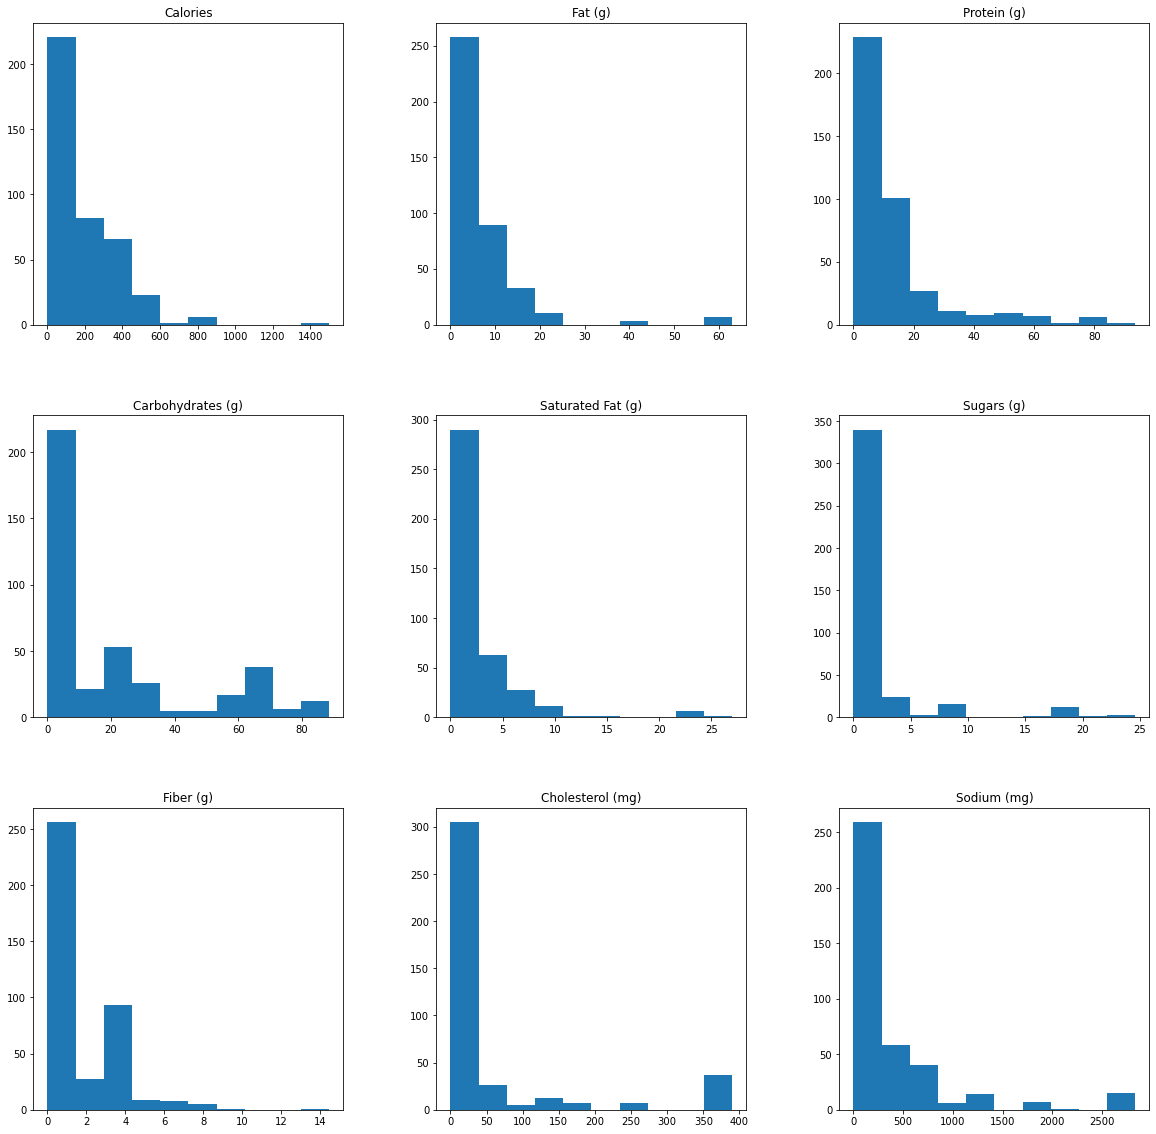

In [10]:
# Histograma por variable
v_num.hist(bins=10,figsize=(20,20),grid=False)

## Análisis bivariado

<AxesSubplot:title={'center':'Scatter Calories | Carbohydrates (g)'}, xlabel='Calories', ylabel='Carbohydrates (g)'>

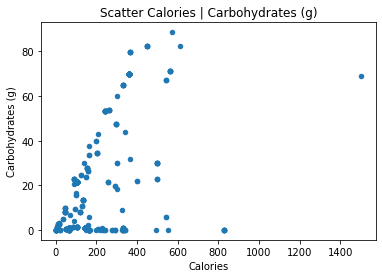

In [11]:
#Scatter plot 1
v_num.plot.scatter(x = 'Calories', y = 'Carbohydrates (g)', title = 'Scatter Calories | Carbohydrates (g)')

In [12]:
v_num[['Calories','Carbohydrates (g)']].corr()

,Calories,Carbohydrates (g)
Calories,1.000000,0.540044
Carbohydrates (g),0.540044,1.000000


<AxesSubplot:title={'center':'Scatter Calories | Sodium (g)'}, xlabel='Calories', ylabel='Sodium (mg)'>

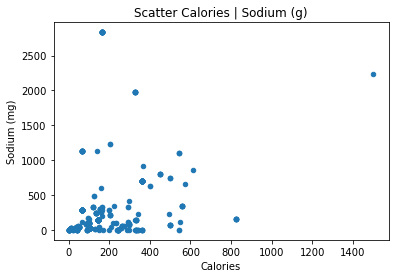

In [13]:
v_num.plot.scatter(x = 'Calories', y = 'Sodium (mg)',title = 'Scatter Calories | Sodium (g)')

In [14]:
v_num[['Calories','Sodium (mg)']].corr()

,Calories,Sodium (mg)
Calories,1.000000,0.185959
Sodium (mg),0.185959,1.000000


<AxesSubplot:title={'center':'Scatter Calories | Fat (g)'}, xlabel='Calories', ylabel='Fat (g)'>

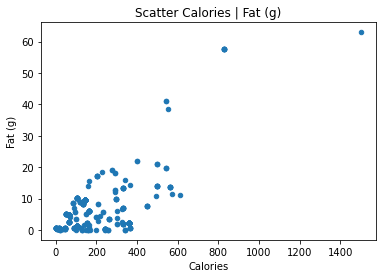

In [15]:
v_num.plot.scatter(x = 'Calories', y = 'Fat (g)',title = 'Scatter Calories | Fat (g)')


In [16]:
v_num[['Calories','Fat (g)']].corr()

,Calories,Fat (g)
Calories,1.000000,0.680008
Fat (g),0.680008,1.000000


<AxesSubplot:title={'center':'Scatter Calories | Protein (g)'}, xlabel='Calories', ylabel='Protein (g)'>

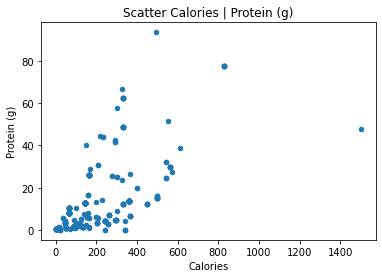

In [17]:
v_num.plot.scatter(x = 'Calories', y = 'Protein (g)',title = 'Scatter Calories | Protein (g)')

In [18]:
v_num[['Calories','Protein (g)']].corr()

,Calories,Protein (g)
Calories,1.000000,0.645845
Protein (g),0.645845,1.000000


# ------------------ Tabla Excercise --------------

## Exploración de datos

In [19]:
df2 = pd.read_csv('ExcerciseDB.csv')


In [20]:
df2.shape

(42, 5)

In [21]:
df2.dtypes

Date               object
Workday/Weekend    object
Excercise          object
Time                int64
Calories Burnt      int64
dtype: object

In [22]:
df2.columns

Index(['Date', 'Workday/Weekend', 'Excercise', 'Time', 'Calories Burnt'], dtype='object')

In [23]:
for col in df2:
    print(col)
    print(df2[col].unique())

Date
['2/18/21' '2/19/21' '2/20/21' '2/21/21' '2/22/21' '2/23/21' '2/24/21'
 '2/25/21' '2/26/21' '2/27/21' '2/28/21' '3/1/21' '3/2/21' '3/3/21'
 '3/4/21' '3/5/21' '3/6/21' '3/7/21' '3/8/21' '3/9/21' '3/10/21' '3/11/21'
 '3/12/21' '3/13/21' '3/14/21' '3/15/21' '3/16/21' '3/17/21' '3/18/21'
 '3/19/21' '3/20/21' '3/21/21' '3/22/21' '3/23/21' '3/24/21' '3/25/21'
 '3/26/21' '3/27/21' '3/28/21' '3/29/21' '3/30/21' '3/31/21']
Workday/Weekend
['Workday' 'Weekend']
Excercise
['Yes' 'No']
Time
[65 48 70  0 71 80 58 51 30 66 77 55 42 53 25 61 56 72 85 62 78 64 35]
Calories Burnt
[510 398 550   0 670 458 537 308 362 427 638 284 641 319 350 565 402 520
 385 750 235 240 658 324 426 456 654 723 647 541 689 487]


In [24]:
v_cat2=df2[['Date','Workday/Weekend','Excercise']]

In [25]:
v_num2 = df2[['Time','Calories Burnt']]

## Análisis Univariado

In [26]:
df2.describe()

,Time,Calories Burnt
count,42.000000,42.000000
mean,51.357143,410.119048
std,24.946598,216.800257
min,0.000000,0.000000
25%,43.500000,310.750000
50%,58.000000,426.500000
75%,69.000000,550.000000
max,85.000000,750.000000


array([[<AxesSubplot:title={'center':'Time'}>,
        <AxesSubplot:title={'center':'Calories Burnt'}>]], dtype=object)

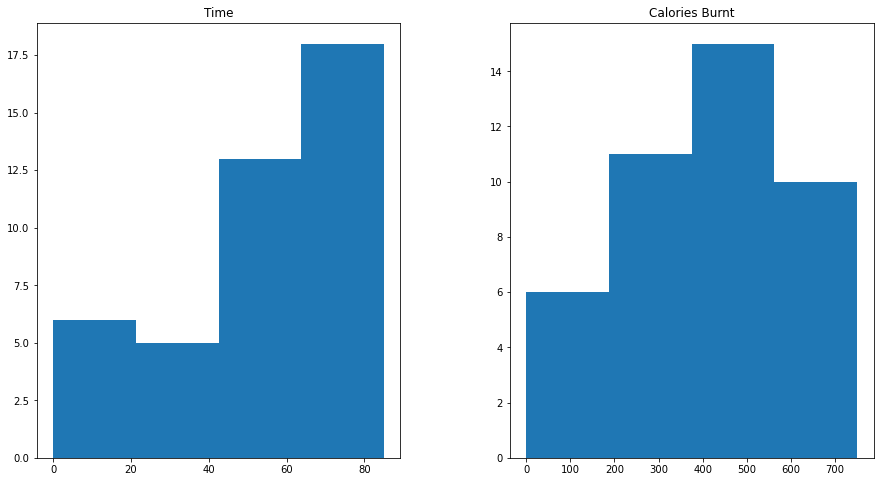

In [27]:
v_num2.hist(bins=4,figsize=(15,8),grid=False)

## Análisis bivariado

<AxesSubplot:title={'center':'Scatter Time | Calories Burnt'}, xlabel='Time', ylabel='Calories Burnt'>

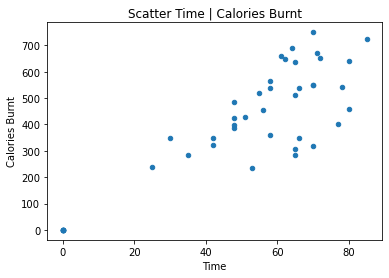

In [28]:
v_num2.plot.scatter(x = 'Time', y = 'Calories Burnt',title='Scatter Time | Calories Burnt')

In [29]:
v_num2[['Time','Calories Burnt']].corr()

,Time,Calories Burnt
Time,1.000,0.856
Calories Burnt,0.856,1.000


# Análisis Importante para el cruce de tablas y insights extra

<AxesSubplot:title={'center':'Total calories EATEN per day'}, xlabel='Date'>

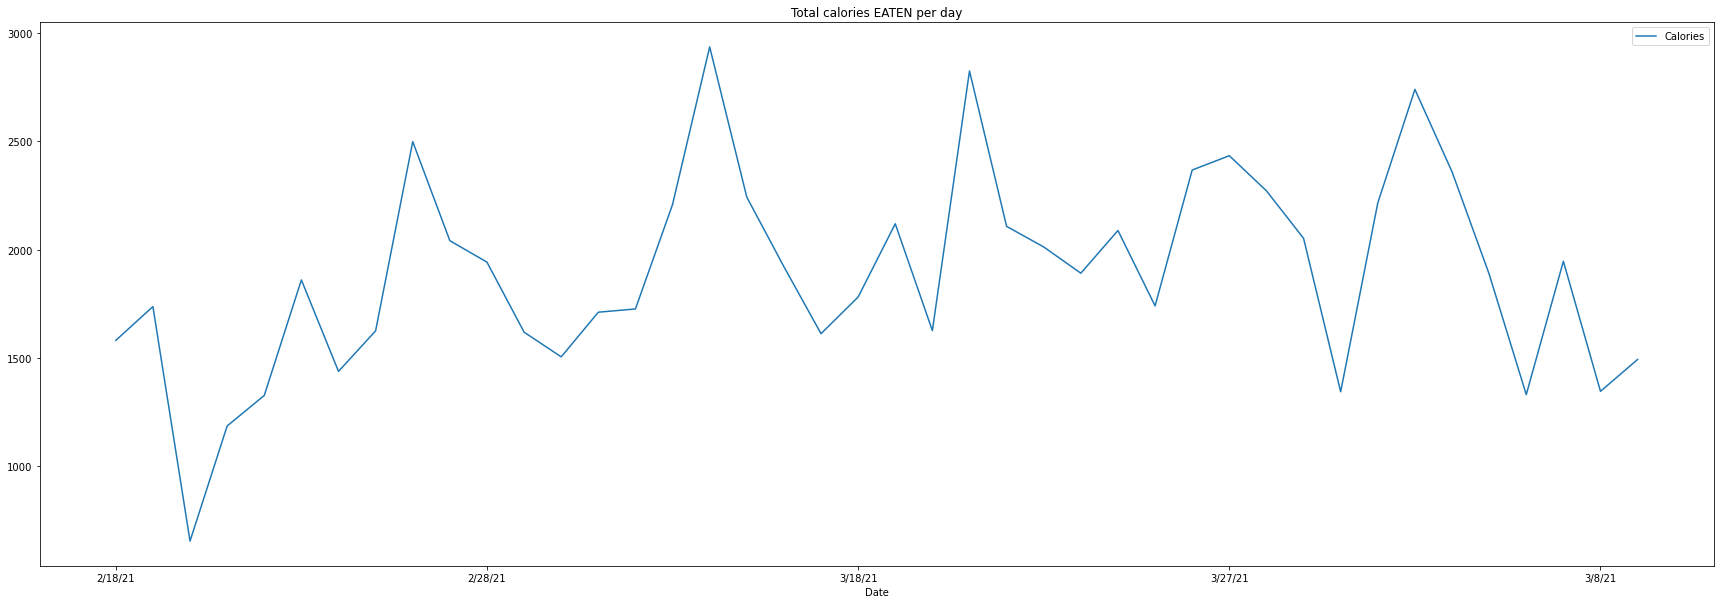

In [30]:
pt = pd.pivot_table(data=df,index = 'Date',values='Calories',aggfunc=np.sum)
pt.plot(kind='line',title='Total calories EATEN per day', figsize=(30,10))

### Observaciones

* El consumo de calorias es consistente 
* Todos los días a de 4 se mantuvieron dentro del rango de entre 1000 y 2000 calorias
* El 20 de febrero posiblemente no se registró el consumo de comida

<AxesSubplot:title={'center':'Total calories BURNT per day'}, xlabel='Date'>

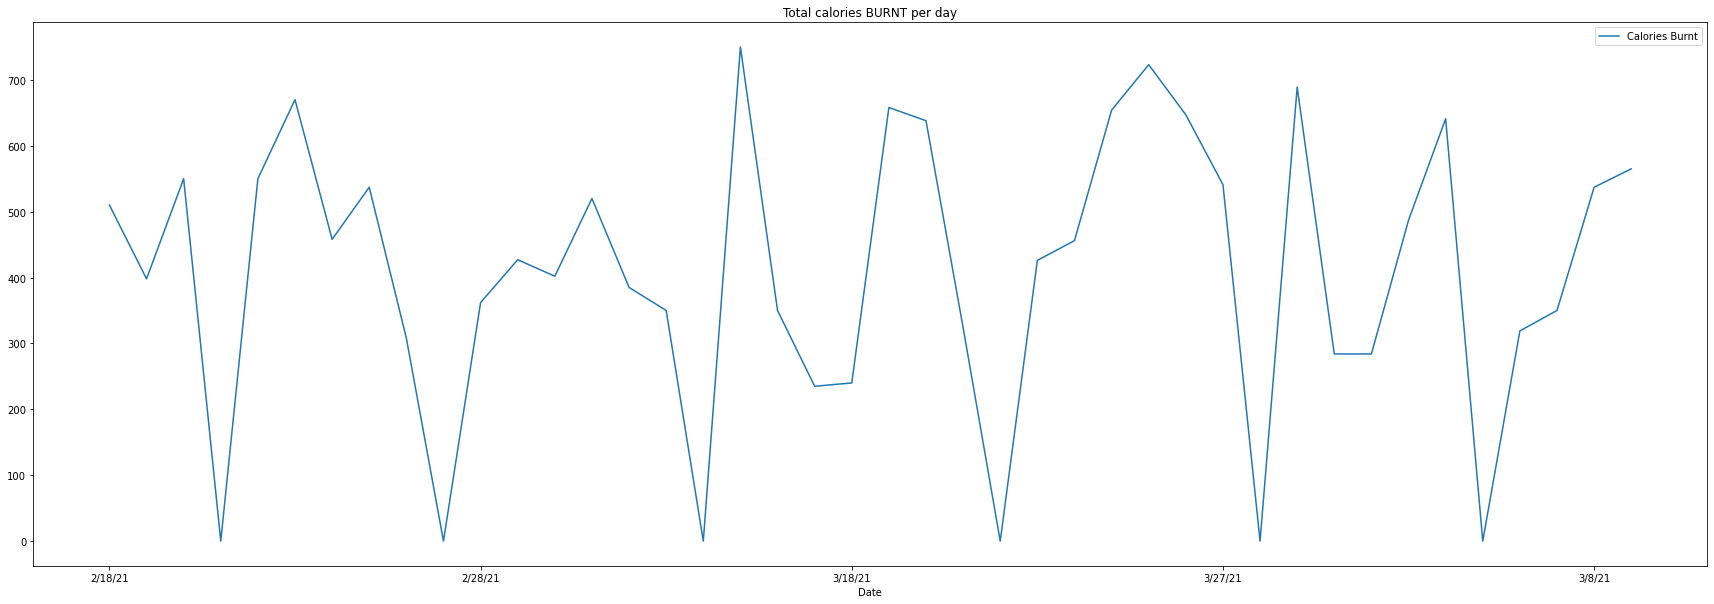

In [31]:
pt4 = pd.pivot_table(data=df2,index = 'Date',values='Calories Burnt',aggfunc=np.sum)
pt4.plot(kind='line',title='Total calories BURNT per day',figsize=(30,10))

### Observaciones

* Es muy evidente que se hace ejericcio 6 días y se descansa 1 
* 3 días de la semana se hace ejercicio intenso, 2 moderado y 1 ligero
* Hay una correlación muy evidente entre las calorias quemadas y el tipo de ejercicio

<AxesSubplot:title={'center':'Sum of protein per type of meal'}, xlabel='Type'>

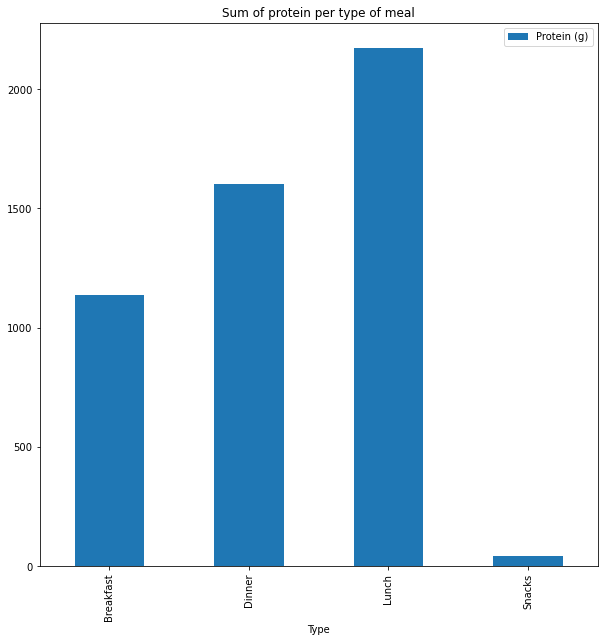

In [32]:
pt2 = pd.pivot_table(data=df,index = 'Type',values='Protein (g)',aggfunc=np.sum)
pt2.plot(kind='bar',title='Sum of protein per type of meal', figsize=(10,10))

### Observaciones

* La hora de la comida es el momento donde más proteina se consume, seguido de la cena y finalmente el desayuno 
* Los snacks se pueden despreciar ya que muy rara ves se consume


<AxesSubplot:title={'center':'Days with excercise vs days without'}, xlabel='Excercise'>

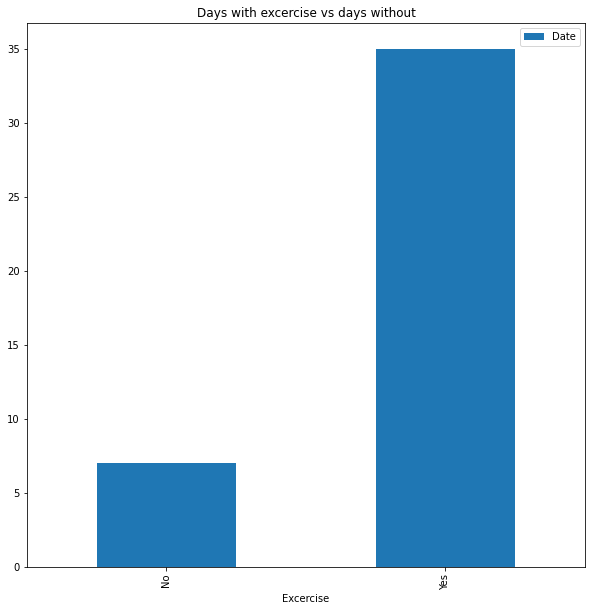

In [33]:
pt3 = pd.pivot_table(data=df2,index = 'Excercise',values = 'Date',aggfunc='count')
pt3.plot(kind='bar',title='Days with excercise vs days without', figsize=(10,10))

### Observaciones

* Evidencia de que se ejercitan 6 días y se descansa 1

# Análisis de habitos nutricionales

## Análisis 1

* Mi hipótesis es que en la comida es en el momento que más proteina como ya que es la comida mas pesada que se realiza en mi casa y es el momento donde mi cuerpo termina de recuperar lo quemado en el ejercicio y adquiere energia para continuar con el resto del dia

In [34]:
#Filtrado de datos

it=df[['Date','Type','Protein (g)']]
it1 = it.loc[it['Type'] == 'Breakfast']
pt1 = pd.pivot_table(data=it1,index = 'Date',values = 'Protein (g)',aggfunc=np.sum)
avg=pt1['Protein (g)'].mean()

it2 = it.loc[it['Type'] == 'Lunch']
pt2 = pd.pivot_table(data=it2,index = 'Date',values = 'Protein (g)',aggfunc=np.sum)
avg2=pt2['Protein (g)'].mean()

it3 = it.loc[it['Type'] == 'Dinner']
pt3 = pd.pivot_table(data=it3,index = 'Date',values = 'Protein (g)',aggfunc=np.sum)
avg3=pt3['Protein (g)'].mean()


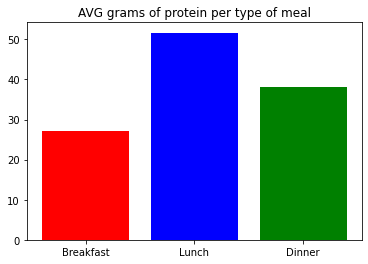

In [35]:
x = ['Breakfast','Lunch','Dinner']
y = [avg,avg2,avg3]

plt.bar(x, y,color=['red', 'blue','green'])
plt.title('AVG grams of protein per type of meal')
plt.show()

In [36]:
breakfast = round((avg*100)/(avg+avg2+avg3),2)
lunch = round((avg2*100)/(avg+avg2+avg3),2)
dinner = round((avg3*100)/(avg+avg2+avg3),2)
print('EL DESAYUNO EQUVALE AL', breakfast, '% DEL CONSUMO DIARIO PROMEDIO DE PROTEINA')
print('LA COMIDA EQUVALE AL', lunch, '% DEL CONSUMO DIARIO PROMEDIO DE PROTEINA')
print('LA CENA EQUVALE AL', dinner, '% DEL CONSUMO DIARIO PROMEDIO DE PROTEINA')


EL DESAYUNO EQUVALE AL 23.18 % DEL CONSUMO DIARIO PROMEDIO DE PROTEINA
LA COMIDA EQUVALE AL 44.2 % DEL CONSUMO DIARIO PROMEDIO DE PROTEINA
LA CENA EQUVALE AL 32.62 % DEL CONSUMO DIARIO PROMEDIO DE PROTEINA


### Después de realizar el análisis de el consumo promedio de proteinas por comida podemos comprobar que la hora de la comida es el momento donde mas proteina se come a comparación del resto de las comidas del día

## Análisis 2

* Mi hipotesis es que existe una relación entre el tiempo de ejercicio y la cantidad de calorias activas que se queman en el periodo de ejercicio sin importar si el ejercicio es pesado, moderado o ligero

In [37]:
filt2=df2[['Time','Calories Burnt']]
filt2.describe()

,Time,Calories Burnt
count,42.000000,42.000000
mean,51.357143,410.119048
std,24.946598,216.800257
min,0.000000,0.000000
25%,43.500000,310.750000
50%,58.000000,426.500000
75%,69.000000,550.000000
max,85.000000,750.000000


<AxesSubplot:title={'center':'Scatter Time | Calories Burnt'}, xlabel='Time', ylabel='Calories Burnt'>

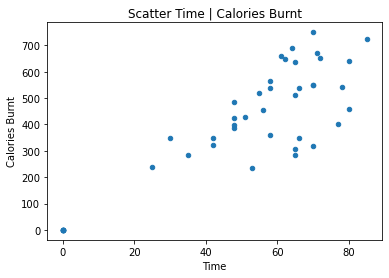

In [38]:
filt2.plot.scatter(x = 'Time', y = 'Calories Burnt',title='Scatter Time | Calories Burnt')

* A simple vista se puede observar una linea de tendencia muy marcada, conrorme aumenta el tiempo de ejercicio aumentan las calorias quemadas

In [39]:
filt2[['Time','Calories Burnt']].corr()

,Time,Calories Burnt
Time,1.000,0.856
Calories Burnt,0.856,1.000


* Al obtener un índice de correlación de 0.856, podemos determinar que la relación entre ambas variables es FUERTE

### Después de analizar si existe una relación entre tiempo y calorias quemadas durante el ejercicio, podemos concluir que si, efectivamente entre más ejercicio hagas aumenta el consumo de calorias sin importar la intensidad del ejercicio


## Análisis 3

* Para este análisis vamos a determinar si en mi día a día tengo un deficit calórico o consumo cas calorias de las que quemo. Esto con el fín de determinar si la tendencia es a bajar subir o mantenerme en el mismo peso

In [40]:
pt5 = pd.pivot_table(data=df,index = 'Date',values = 'Calories',aggfunc=np.sum)
pt6 = pd.pivot_table(data=df2,index = 'Date',values = 'Calories Burnt',aggfunc=np.sum)


In [41]:
mix=pt5.merge(pt6,on='Date',how = 'left')
mix['Diference'] = mix['Calories']-mix['Calories Burnt']
mix

,Calories,Calories Burnt,Diference
Date,,,
2/18/21,1581.0,510,1071.0
2/19/21,1737.0,398,1339.0
2/20/21,655.0,550,105.0
2/21/21,1186.0,0,1186.0
2/22/21,1327.0,550,777.0
2/23/21,1860.0,670,1190.0
2/24/21,1438.0,458,980.0
2/25/21,1625.0,537,1088.0
2/26/21,2498.0,308,2190.0


<AxesSubplot:xlabel='Date'>

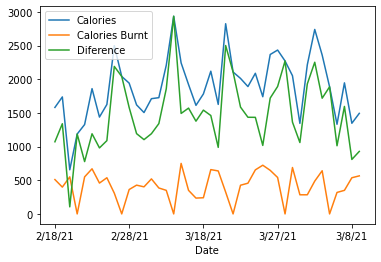

In [42]:
mix[['Calories','Calories Burnt','Diference']].plot(kind = 'line')

In [43]:
dif=mix['Diference'].mean()

In [45]:
print('En promedio como ', dif, ' más calorias que las que quemo, si consideramos que por el hecho de estar vivos quemamos alrededor de 2000 calorias extra diariaspodemos determinar que la tendencia es a subir de peso ligeramente o mantenerse estable')

En promedio como  1478.9285714285713  más calorias que las que quemo, si consideramos que por el hecho de estar vivos quemamos alrededor de 2000 calorias extra diariaspodemos determinar que la tendencia es a subir de peso ligeramente o mantenerse estable
